In [95]:
import galsim
import numpy as np
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 500
plt.rcParams["axes.grid"] = False
from matplotlib.colors import LogNorm

In [96]:
stampsize=64
gal_image = galsim.ImageF(stampsize, stampsize )
psf_image = galsim.ImageF(stampsize, stampsize )
galpsf_conv_image = galsim.ImageF(stampsize, stampsize )
galpsf_conv_deconv_image = galsim.ImageF(stampsize, stampsize )

In [154]:
gal = galsim.Gaussian(sigma=2.0, flux=1.0)
gal = gal.shear(g1=0.5, g2=0.0)
#jitter_range = 0.5
#gal = gal.shift(np.random.uniform(-jitter_range,jitter_range), np.random.uniform(-jitter_range,jitter_range))
image= gal.drawImage(gal_image)
#image.addNoise(galsim.GaussianNoise(sigma=1.0))

#PSF IMAGE
psf = galsim.Gaussian(sigma=1.0, flux=1.0)
psf = psf.shear(g1=0.2, g2=0.1)
#jitter_range = 10
#psf = psf.shift(np.random.uniform(-jitter_range,jitter_range), np.random.uniform(-jitter_range,jitter_range))
image= psf.drawImage(psf_image)
#image.addNoise(galsim.GaussianNoise(sigma=1.0))

##CONVOLVED
galconv = galsim.Convolve([gal,psf])
image=galconv.drawImage(galpsf_conv_image)

##DECONVOLVED
inv_psf = galsim.Deconvolve(psf)
deconv_gal = galsim.Convolve(inv_psf, gal)
image=deconv_gal.drawImage(galpsf_conv_deconv_image)

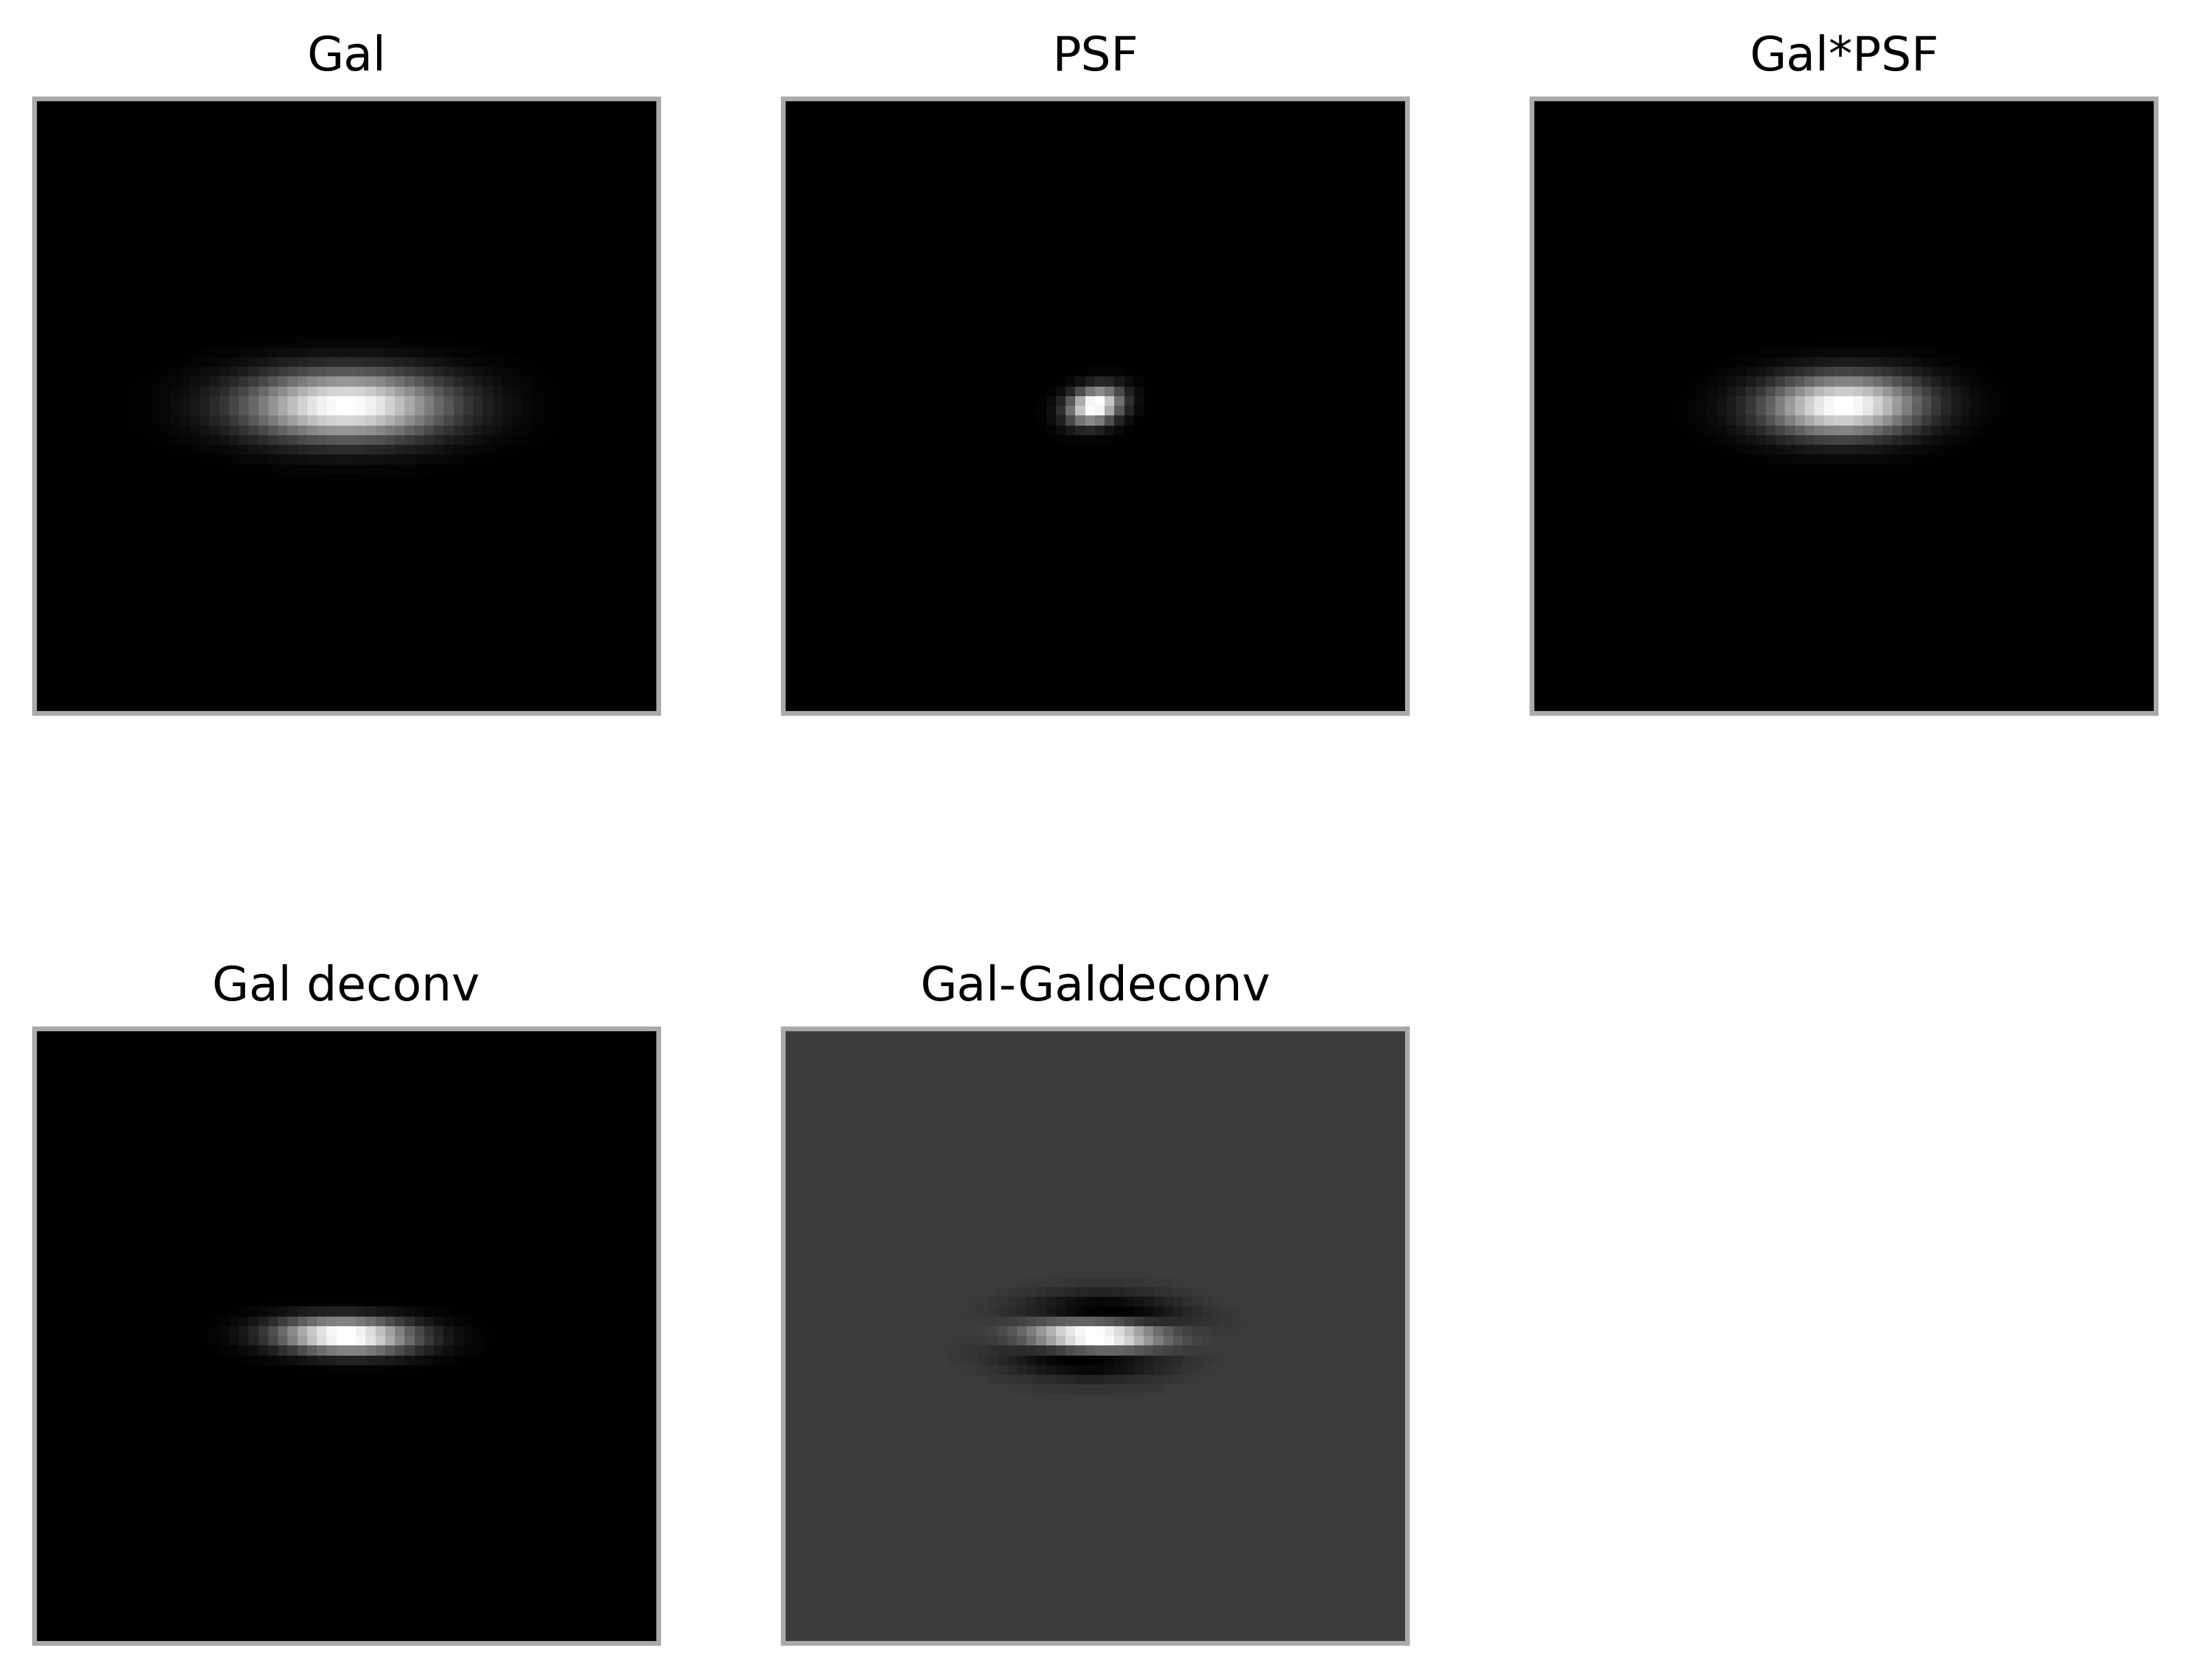

In [155]:
plt.style.use(astropy_mpl_style)
cmap='gray'
#fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4)
fig, axs= plt.subplots(2, 3)
ax1=axs[0][0]
ax2=axs[0][1]
ax3=axs[0][2]
ax4=axs[1][0]
ax5=axs[1][1]
axs[1][2].axis('off')
norm=None
arrays=[img.array for img in [gal_image,psf_image,galpsf_conv_image, galpsf_conv_deconv_image]]
arrays+=[arrays[-1]-arrays[-2]]
for ax, dat,title in zip([ax1,ax2,ax3,ax4,ax5],arrays,["Gal","PSF", "Gal*PSF","Gal deconv", "Gal-Galdeconv"]):
        ax.imshow(dat,cmap=cmap,norm=norm)
        ax.grid(None)
        ax.set_ylim(0, 63)
        ax.set_title(title,size=10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

In [153]:
res =None
try:
    res = galsim.hsm.FindAdaptiveMom(gal_image, guess_sig=15.0)
except:
    print("HSM failed measuring")

In [42]:
if res is not None:
    flux = res.moments_amp
    g1 = res.observed_shape.g1
    g2 = res.observed_shape.g2
    x = res.moments_centroid.x -0.5
    y = res.moments_centroid.y -0.5
    sigma= res.moments_sigma
    measures=[g1,g2,sigma,flux,x,y]

In [43]:
measures

[0.19256299799814958,
 0.09631997213544922,
 1.5162967443466187,
 1.0001394748687744,
 32.147401241405014,
 30.53830533079418]